# IMPORTING LIBRARIES

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# IMPORTING DATASET

In [62]:
df =pd.read_csv(r'autos1.csv',encoding = "ISO-8859-1")
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


# TAKING CARE OF MISSING DATA

In [63]:
df.isnull().any()

dateCrawled            False
name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dateCreated            False
nrOfPictures           False
postalCode             False
lastSeen               False
dtype: bool

In [64]:
df.isnull().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [65]:
df.describe()


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


In [66]:
df.drop(['name','seller','abtest','offerType', 'dateCrawled', 'nrOfPictures', 'lastSeen', 'postalCode', 'dateCreated'], axis='columns', inplace=True)

In [67]:
df.isnull().sum()

price                      0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dtype: int64

In [68]:
df.shape

(371528, 11)

In [69]:
df["notRepairedDamage"].fillna("nein",inplace = True)
df["notRepairedDamage"].isnull().sum()


0

In [70]:
df["fuelType"].fillna("benzin",inplace = True)
df["fuelType"].isnull().sum()

0

In [71]:
df['vehicleType'].fillna(df['vehicleType'].mode().iloc[0],inplace=True)
df['gearbox'].fillna(df['gearbox'].mode().iloc[0],inplace=True)
df.isnull().sum()

price                      0
vehicleType                0
yearOfRegistration         0
gearbox                    0
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType                   0
brand                      0
notRepairedDamage          0
dtype: int64

In [72]:
df["model"].fillna("golf",inplace =True)
df.isnull().sum()

price                  0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
notRepairedDamage      0
dtype: int64

In [73]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000


In [74]:
df.dtypes

price                   int64
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
notRepairedDamage      object
dtype: object

In [75]:
df

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein
1,18300,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein
371524,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,nein


# DATA VISUALIZATION

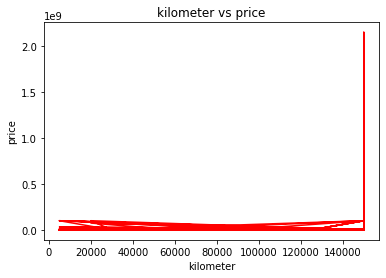

In [16]:
plt.plot(df['kilometer'],df['price'],"r")
plt.xlabel('kilometer')
plt.ylabel('price')
plt.title('kilometer vs price')
plt.show()

Text(0.5, 1.0, 'kilometer vs price')

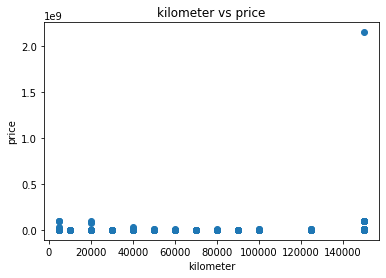

In [17]:
plt.scatter(df['kilometer'],df['price'])
plt.xlabel('kilometer')
plt.ylabel('price')
plt.title('kilometer vs price')


Text(0.5, 1.0, 'vehicletype vs price')

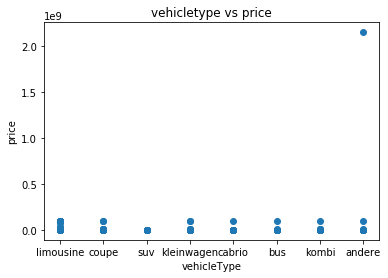

In [18]:
plt.scatter(df['vehicleType'],df['price'])
plt.xlabel('vehicleType')
plt.ylabel('price')
plt.title('vehicletype vs price')

Text(0.5, 1.0, 'yearOfRegistration vs price')

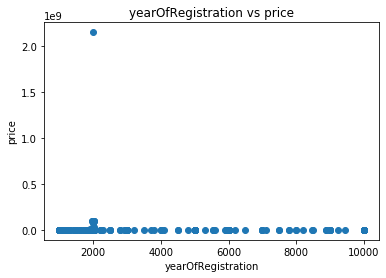

In [19]:
plt.scatter(df['yearOfRegistration'],df['price'])
plt.xlabel('yearOfRegistration')
plt.ylabel('price')
plt.title('yearOfRegistration vs price')

Text(0.5, 1.0, 'gearbox vs price')

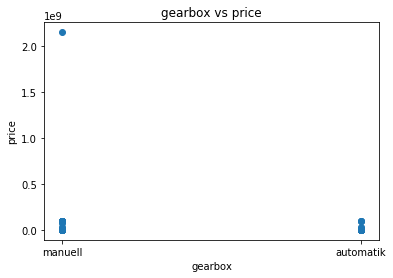

In [20]:
plt.scatter(df['gearbox'],df['price'])
plt.xlabel('gearbox')
plt.ylabel('price')
plt.title('gearbox vs price')

Text(0.5, 1.0, 'powerPS vs price')

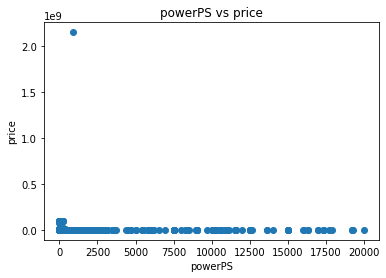

In [21]:
plt.scatter(df['powerPS'],df['price'])
plt.xlabel('powerPS')
plt.ylabel('price')
plt.title('powerPS vs price')

Text(0.5, 1.0, 'fuelType vs price')

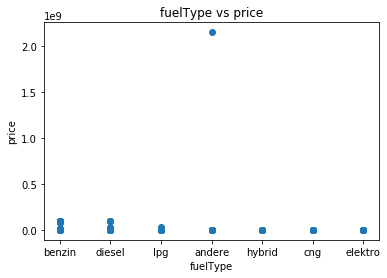

In [22]:
plt.scatter(df['fuelType'],df['price'])
plt.xlabel('fuelType')
plt.ylabel('price')
plt.title('fuelType vs price')

Text(0.5, 1.0, 'brand vs price')

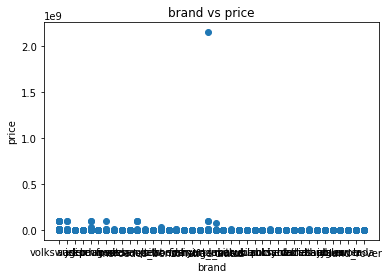

In [23]:
plt.scatter(df['brand'],df['price'])
plt.xlabel('brand')
plt.ylabel('price')
plt.title('brand vs price')

Text(0.5, 1.0, 'notRepairedDamage vs price')

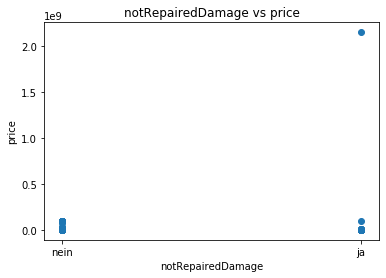

In [24]:
plt.scatter(df['notRepairedDamage'],df['price'])
plt.xlabel('notRepairedDamage')
plt.ylabel('price')
plt.title('notRepairedDamage vs price')

Text(0.5, 1.0, 'monthOfRegistration vs price')

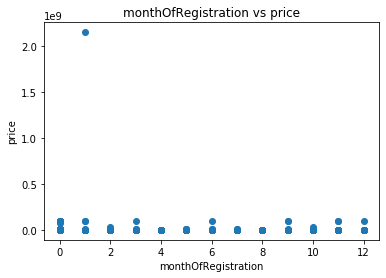

In [25]:
plt.scatter(df['monthOfRegistration'],df['price'])
plt.xlabel('monthOfRegistration')
plt.ylabel('price')
plt.title('monthOfRegistration vs price')

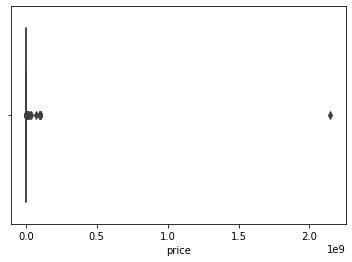

In [26]:
sns.boxplot(df['price'])

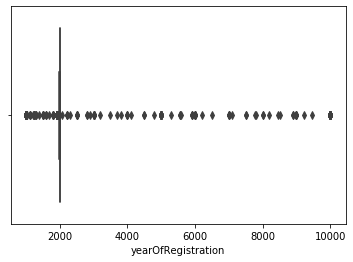

In [27]:
sns.boxplot(df['yearOfRegistration'])

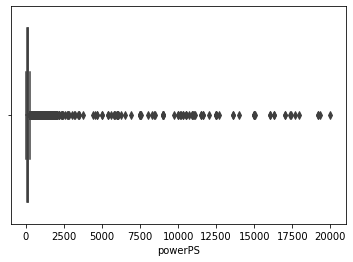

In [28]:
sns.boxplot(df['powerPS'])

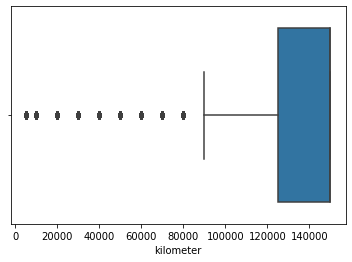

In [29]:
sns.boxplot(df['kilometer'])

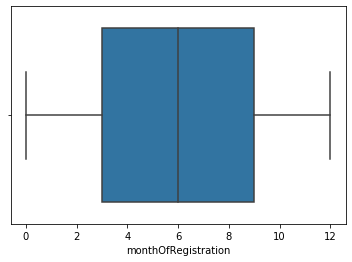

In [30]:
sns.boxplot(df['monthOfRegistration'])

In [31]:
df.corr()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration
price,1.000000,-0.000182,0.006850,-0.000635,-0.002826
yearOfRegistration,-0.000182,1.000000,0.000351,-0.055319,-0.011607
powerPS,0.006850,0.000351,1.000000,-0.010738,0.044358
kilometer,-0.000635,-0.055319,-0.010738,1.000000,0.001838
monthOfRegistration,-0.002826,-0.011607,0.044358,0.001838,1.000000


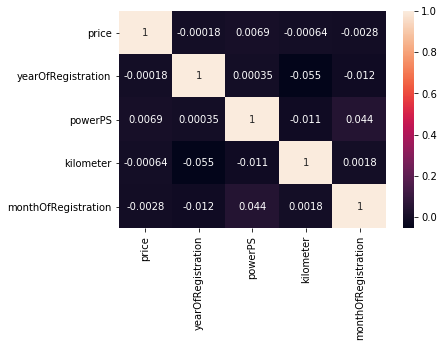

In [32]:
sns.heatmap(df.corr(),annot=True)

In [33]:
df

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,limousine,1993,manuell,0,golf,150000,0,benzin,volkswagen,nein
1,18300,coupe,2011,manuell,190,golf,125000,5,diesel,audi,ja
2,9800,suv,2004,automatik,163,grand,125000,8,diesel,jeep,nein
3,1500,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein
4,3600,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,limousine,2005,manuell,0,golf,20000,1,benzin,sonstige_autos,nein
371524,1199,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein
371525,9200,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein
371526,3400,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,nein


# Label Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder
data = df.copy()

In [77]:
data["vehicleType"] =LabelEncoder().fit_transform(data["vehicleType"])
data["fuelType"] =LabelEncoder().fit_transform(data["fuelType"])
data["gearbox"] =LabelEncoder().fit_transform(data["gearbox"])
data["notRepairedDamage"] =LabelEncoder().fit_transform(data["notRepairedDamage"])
data["brand"] =LabelEncoder().fit_transform(data["brand"])
data["model"] =LabelEncoder().fit_transform(data["model"])
#data["abtest"] =LabelEncoder().fit_transform(data["abtest"])

# Outliers Removal

In [78]:
data[data.yearOfRegistration > 2017].shape

(4134, 11)

In [79]:
data[data.yearOfRegistration < 1950].shape

(289, 11)

In [80]:
data[data.price < 100].shape

(13320, 11)

In [81]:
data["price"].value_counts()

0         10778
500        5670
1500       5394
1000       4649
1200       4594
          ...  
23456         1
171000        1
21830         1
13485         1
8188          1
Name: price, Length: 5597, dtype: int64

In [82]:
data[data.price > 200000].shape

(170, 11)

In [83]:
min(data.price)

0

In [84]:
max(data.price)

2147483647

In [85]:
data = data[(data.yearOfRegistration < 2017)  & (data.yearOfRegistration > 1950)]
data = data[(data.price > 100) & (data.price < 200000) ]

In [86]:
data

,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,480,6,1993,1,0,118,150000,0,1,38,1
1,18300,3,2011,1,190,118,125000,5,3,1,0
2,9800,7,2004,0,163,119,125000,8,3,14,1
3,1500,4,2001,1,75,118,150000,6,1,38,1
4,3600,4,2008,1,69,103,90000,7,3,31,1
...,...,...,...,...,...,...,...,...,...,...,...
371523,2200,6,2005,1,0,118,20000,1,1,33,1
371524,1199,2,2000,0,101,108,125000,3,1,32,1
371525,9200,1,1996,1,102,225,150000,3,3,38,1
371526,3400,5,2002,1,100,118,150000,6,3,38,1


In [87]:
y  = data["price"]
x =  data.drop("price",axis=1)

# SPLITTING DATA INTO TRAIN AND TEST

In [88]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state = 0)

In [89]:
from sklearn.ensemble import RandomForestRegressor
# classifier
rfr = RandomForestRegressor(n_estimators=10,criterion="mse",random_state=0)
rfr.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [90]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(criterion="mse",random_state=0)
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [91]:
from joblib import dump
dump(rfr,'rfrdone1.save')

['rfrdone1.save']

In [92]:
y_pred=rfr.predict(x_test)
y_pred

array([9424.29166667,  805.        , 8564.08333333, ...,  967.33333333,
       1512.9       , 4060.        ])

In [93]:
from sklearn.metrics import r2_score#to find accuracy of the model by pred with input 
r2_score(y_test,y_pred)

0.8100578203428344

In [ ]:
y_pred=dt.predict(x_test)
y_pred

In [51]:
x

,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage
0,6,1993,1,0,118,150000,0,1,38,1
1,3,2011,1,190,118,125000,5,3,1,0
2,7,2004,0,163,119,125000,8,3,14,1
3,4,2001,1,75,118,150000,6,1,38,1
4,4,2008,1,69,103,90000,7,3,31,1
...,...,...,...,...,...,...,...,...,...,...
371523,6,2005,1,0,118,20000,1,1,33,1
371524,2,2000,0,101,108,125000,3,1,32,1
371525,1,1996,1,102,225,150000,3,3,38,1
371526,5,2002,1,100,118,150000,6,3,38,1


In [52]:
vehicleType = df["vehicleType"].unique()
fuelType = df["fuelType"].unique()

print(vehicleType)
print(fuelType)


['limousine' 'coupe' 'suv' 'kleinwagen' 'cabrio' 'bus' 'kombi' 'andere']
['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']


In [53]:
vehicleType = data["vehicleType"].unique()
fuelType = data["fuelType"].unique()

print(vehicleType)
print(fuelType)


[6 3 7 4 2 1 5 0]
[1 3 6 0 5 2 4]


In [54]:
gear= df["gearbox"].unique()
print(gear)

['manuell' 'automatik']


In [55]:
gear= data["gearbox"].unique()
print(gear)

[1 0]


In [56]:
model= df["model"].unique()
print(model)

['golf' 'grand' 'fabia' '3er' '2_reihe' 'andere' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' 'glk' '100'
 'z_reihe' 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran'
 'getz' 'a3' 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo'
 'cordoba' 'colt' 'impreza' 'vectra' 'berlingo' 'm_klasse' 'tiguan'
 'i_reihe' 'espace' 'sharan' '6_reihe' 'panda' 'up' 'seicento' 'ceed'
 '5_reihe' 'yeti' 'octavia' 'mii' 'rx_reihe' '6er' 'modus' 'fox' 'matiz'
 'beetle' 'c1' 'rio' 'touareg' 'logan' 'spider' 'cuore' 's_max' 'a2'
 'x_reihe' 'a5' 'galaxy' 'c3' 'viano' 's_klasse' '1_reihe' 'avensis' 'sl'
 'roomster' 'q5' '

In [57]:
model= data["model"].unique()
print(model)

[118 119 103  11   8  61  10 171 161 174 228  33 200  15  42  40  74 225
 177  97  76 131 135 167 108   6  48 206  43  32 126 104  60 153 238 214
   3 100 106 245 199  29 130  26 124  80 105 226  84  31 125 166 209  19
  20   2 117   0 249 210 230 122 159  99 223 115  28  37 151 145 182  63
 156  82  79 123 235  51 147 220 205  17  58 170 229 121  70  14 247 165
 250 154 191  18 155 109 150  50  55 188 222 144 212  88 194  27 242  30
 114  57 237 193   5  45 208 190 179 132 198  81 142  12 213 138 176  77
 175 101 102   4 224 128 181  66  34  83 140 172  53 236 217 187 137 173
 134 216 215  36  25 148 189 248  68 113 129  22 207  87  35  96 231 160
  13 152  92  62 234 246  59  47 201  69  67 111  52 107  75 219   9 178
  85 211 233 244  95 195 243 221  38 240  64  54 183  41 227 180  73 127
  89 241 146 185 139 110  65 184 197 163  23  90  72  78 196 141 169  44
  56 162 192 164 239 112 143  21  16 203  71  86 168 116  94 158  39 157
  24 232   7   1  49  91  46 218 186 149 133  98 12

In [58]:
model= df["brand"].unique()
print(model)

['volkswagen' 'audi' 'jeep' 'skoda' 'bmw' 'peugeot' 'ford' 'mazda'
 'nissan' 'renault' 'mercedes_benz' 'opel' 'seat' 'citroen' 'honda' 'fiat'
 'mini' 'smart' 'hyundai' 'sonstige_autos' 'alfa_romeo' 'subaru' 'volvo'
 'mitsubishi' 'kia' 'suzuki' 'lancia' 'porsche' 'toyota' 'chevrolet'
 'dacia' 'daihatsu' 'trabant' 'saab' 'chrysler' 'jaguar' 'daewoo' 'rover'
 'land_rover' 'lada']


In [59]:
model= data["brand"].unique()
print(model)

[38  1 14 31  2 25 10 19 23 27 20 30 11  9 24 21 32 12  0 34 39 22 15 35
 17 26  5 33 36  3  6  8  4 13  7 28 29 18 37 16]


In [60]:
model= df["notRepairedDamage"].unique()
print(model)

['nein' 'ja']
